In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Generate some sample data (replace this with your actual dataset)
data = np.random.rand(100, 4)  # 100 samples with 4 features each
targets = np.random.rand(100, 20)  # 100 samples with 20 target elements each

# Split the data into training and testing sets
split_ratio = 0.7  # 70% for training, 30% for testing
split_index = int(len(data) * split_ratio)

x_train, x_test = data[:split_index], data[split_index:]
y_train, y_test = targets[:split_index], targets[split_index:]

print('x_test shape =', x_test.shape)
print('y_test shape =', y_test.shape)

x_test shape = (30, 4)
y_test shape = (30, 20)


In [2]:
# Reshape the input data to match the expected input shape of the model
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

print('x_test shape =', x_test.shape)

x_test shape = (30, 1, 4)


In [3]:
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential()

# Add an LSTM layer with suitable input shape
model.add(LSTM(units=64, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))

# Add additional LSTM layers if needed
# model.add(LSTM(units=64, return_sequences=True))
# ...

# Add a Dense (fully connected) layer to output the 20-element prediction
model.add(Dense(units=20))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


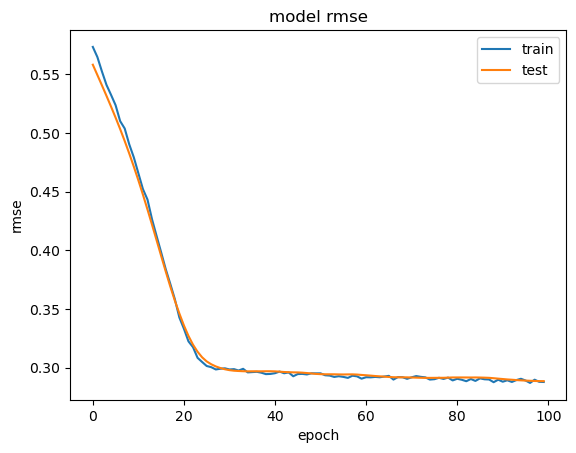

In [4]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=0)

# List all data in history
print(history.history.keys())

# Summarize history for RMSE
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [5]:
# Generate predictions on the test set
y_pred = model.predict(x_test)

print('y_test shape =', y_test.shape)
###print('y_test', y_test)
print('y_pred shape =', y_pred.shape)
###print('y_pred', y_pred)

1/1 [==============================] - 0s 437ms/step
y_test shape = (30, 20)
y_pred shape = (30, 1, 20)


In [6]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
import math

# Flatten the predictions and ground truth to calculate RMSE
y_pred_flat = y_pred.reshape(-1, 20)
y_test_flat = y_test.reshape(-1, 20)

rmse = math.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.2905
